<a href="https://colab.research.google.com/github/kunalbathija/Udemy-TF-2.0/blob/master/CNN_CIFAR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import tensorflow as tf
print(tf.__version__)

2.2.0-rc4


In [0]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Input, Conv2D, Dense, Flatten, Dropout, GlobalMaxPooling2D
from tensorflow.keras.models import Model

In [0]:
cifar10 = tf.keras.datasets.cifar10

(x_train, y_train), (x_test, y_test) = cifar10.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0
y_train, y_test = y_train.flatten(), y_test.flatten()
print("x_train.shape:", x_train.shape)
print("y_train.shape", y_train.shape)

x_train.shape: (50000, 32, 32, 3)
y_train.shape (50000,)


In [0]:
K = len(set(y_train))
print("number of classes:", K)

number of classes: 10


In [0]:
i = Input(shape=x_train[0].shape)
x = Conv2D(32, (3, 3), strides=2, activation='relu')(i)
x = Conv2D(64, (3, 3), strides=2, activation='relu')(x)
x = Conv2D(128, (3, 3), strides=2, activation='relu')(x)
x = Flatten()(x)
x = Dropout(0.5)(x)
x = Dense(1024, activation='relu')(x)
x = Dropout(0.2)(x)
x = Dense(K, activation='softmax')(x)

model = Model(i, x)

In [0]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
r = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=15)

Epoch 1/15
1563/1563 [==============================] - 46s 30ms/step - loss: 1.5888 - accuracy: 0.4206 - val_loss: 1.3210 - val_accuracy: 0.5287
Epoch 2/15
1563/1563 [==============================] - 45s 29ms/step - loss: 1.3089 - accuracy: 0.5268 - val_loss: 1.1724 - val_accuracy: 0.5773
Epoch 3/15
1563/1563 [==============================] - 45s 29ms/step - loss: 1.1860 - accuracy: 0.5751 - val_loss: 1.0836 - val_accuracy: 0.6119
Epoch 4/15
1563/1563 [==============================] - 45s 29ms/step - loss: 1.0911 - accuracy: 0.6078 - val_loss: 0.9766 - val_accuracy: 0.6506
Epoch 5/15
1563/1563 [==============================] - 45s 29ms/step - loss: 1.0131 - accuracy: 0.6385 - val_loss: 1.0051 - val_accuracy: 0.6400
Epoch 6/15
1563/1563 [==============================] - 45s 29ms/step - loss: 0.9503 - accuracy: 0.6609 - val_loss: 0.9326 - val_accuracy: 0.6718
Epoch 7/15
1563/1563 [==============================] - 45s 29ms/step - loss: 0.9089 - accuracy: 0.6754 - val_loss: 0.9092 -

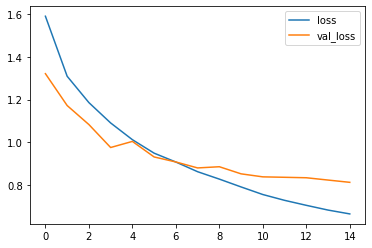

In [0]:
import matplotlib.pyplot as plt
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()

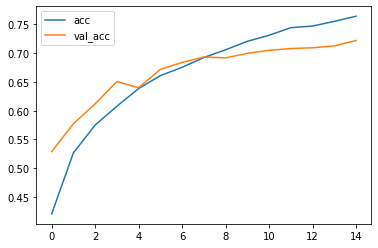

In [0]:
plt.plot(r.history['accuracy'], label='acc')
plt.plot(r.history['val_accuracy'], label='val_acc')
plt.legend()

Confusion matrix, without normalization
[[803  16  32  13  19   5  12   5  72  23]
 [ 29 826   6   9   3   4  13   2  41  67]
 [ 69   4 578  63 119  68  58  23   9   9]
 [ 28   3  63 533  68 183  70  25  13  14]
 [ 23   1  54  70 712  52  35  44   7   2]
 [ 12   5  42 195  53 636  18  32   4   3]
 [ 10   4  32  73  46  23 799   4   7   2]
 [ 22   1  32  43  81  74   6 728   2  11]
 [ 69  18  15  13  10   5   9   3 843  15]
 [ 52  89   8  18   9   8  13  11  31 761]]


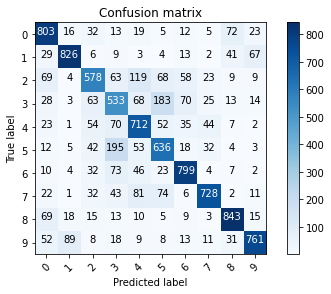

In [0]:
from sklearn.metrics import confusion_matrix
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
  """
  This function prints and plots the confusion matrix.
  Normalization can be applied by setting `normalize=True`.
  """
  if normalize:
      cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
      print("Normalized confusion matrix")
  else:
      print('Confusion matrix, without normalization')

  print(cm)

  plt.imshow(cm, interpolation='nearest', cmap=cmap)
  plt.title(title)
  plt.colorbar()
  tick_marks = np.arange(len(classes))
  plt.xticks(tick_marks, classes, rotation=45)
  plt.yticks(tick_marks, classes)

  fmt = '.2f' if normalize else 'd'
  thresh = cm.max() / 2.
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
      plt.text(j, i, format(cm[i, j], fmt),
               horizontalalignment="center",
               color="white" if cm[i, j] > thresh else "black")

  plt.tight_layout()
  plt.ylabel('True label')
  plt.xlabel('Predicted label')
  plt.show()


p_test = model.predict(x_test).argmax(axis=1)
cm = confusion_matrix(y_test, p_test)
plot_confusion_matrix(cm, list(range(10)))
  

In [0]:
labels = '''airplane
automobile
bird
cat
deer
dog
frog
horse
ship
truck'''.split()

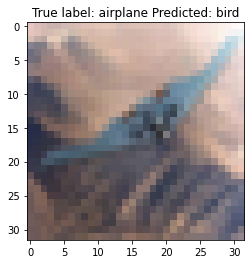

In [0]:
misclassified_idx = np.where(p_test != y_test)[0]
i = np.random.choice(misclassified_idx)
plt.imshow(x_test[i], cmap='gray')
plt.title("True label: %s Predicted: %s" % (labels[y_test[i]], labels[p_test[i]]));

# 2. Improved



In [0]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Input, Conv2D, Dense, Flatten, Dropout, GlobalMaxPooling2D, MaxPooling2D, BatchNormalization
from tensorflow.keras.models import Model

In [0]:
i = Input(shape=x_train[0].shape)
# x = Conv2D(32, (3, 3), strides=2, activation='relu')(i)
# x = Conv2D(64, (3, 3), strides=2, activation='relu')(x)
# x = Conv2D(128, (3, 3), strides=2, activation='relu')(x)

x = Conv2D(32, (3, 3), activation='relu', padding='same')(i)
x = BatchNormalization()(x)
x = Conv2D(32, (3, 3), activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = MaxPooling2D((2, 2))(x)
# x = Dropout(0.2)(x)
x = Conv2D(64, (3, 3), activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = Conv2D(64, (3, 3), activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = MaxPooling2D((2, 2))(x)
# x = Dropout(0.2)(x)
x = Conv2D(128, (3, 3), activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = Conv2D(128, (3, 3), activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = MaxPooling2D((2, 2))(x)
# x = Dropout(0.2)(x)

# x = GlobalMaxPooling2D()(x)
x = Flatten()(x)
x = Dropout(0.2)(x)
x = Dense(1024, activation='relu')(x)
x = Dropout(0.2)(x)
x = Dense(K, activation='softmax')(x)

model = Model(i, x)

In [0]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [0]:
r = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=25)

Epoch 1/25
1563/1563 [==============================] - 456s 292ms/step - loss: 1.2997 - accuracy: 0.5517 - val_loss: 0.9844 - val_accuracy: 0.6558
Epoch 2/25
1563/1563 [==============================] - 454s 290ms/step - loss: 0.8447 - accuracy: 0.7065 - val_loss: 1.0106 - val_accuracy: 0.6592
Epoch 3/25
1563/1563 [==============================] - 454s 291ms/step - loss: 0.6876 - accuracy: 0.7657 - val_loss: 0.6870 - val_accuracy: 0.7620
Epoch 4/25
1563/1563 [==============================] - 454s 290ms/step - loss: 0.5859 - accuracy: 0.7993 - val_loss: 0.6153 - val_accuracy: 0.7938
Epoch 5/25
1563/1563 [==============================] - 452s 289ms/step - loss: 0.4958 - accuracy: 0.8278 - val_loss: 0.8293 - val_accuracy: 0.7478
Epoch 6/25
1563/1563 [==============================] - 456s 292ms/step - loss: 0.4161 - accuracy: 0.8578 - val_loss: 0.6069 - val_accuracy: 0.8091
Epoch 7/25
1563/1563 [==============================] - 457s 292ms/step - loss: 0.3489 - accuracy: 0.8780 - val_

In [23]:
batch_size = 32
data_generator = tf.keras.preprocessing.image.ImageDataGenerator(width_shift_range=0.1, height_shift_range=0.1, horizontal_flip=True)
train_generator = data_generator.flow(x_train, y_train, batch_size)
steps_per_epoch = x_train.shape[0] // batch_size
r = model.fit(train_generator, validation_data=(x_test, y_test), steps_per_epoch=steps_per_epoch, epochs=25)

Epoch 1/25
1562/1562 [==============================] - 423s 271ms/step - loss: 0.2787 - accuracy: 0.9047 - val_loss: 0.4221 - val_accuracy: 0.8617
Epoch 2/25
1562/1562 [==============================] - 444s 284ms/step - loss: 0.2724 - accuracy: 0.9072 - val_loss: 0.4156 - val_accuracy: 0.8611
Epoch 3/25
1562/1562 [==============================] - 460s 295ms/step - loss: 0.2668 - accuracy: 0.9084 - val_loss: 0.4241 - val_accuracy: 0.8666
Epoch 4/25
1562/1562 [==============================] - 446s 286ms/step - loss: 0.2606 - accuracy: 0.9097 - val_loss: 0.4207 - val_accuracy: 0.8685
Epoch 5/25
1562/1562 [==============================] - 441s 282ms/step - loss: 0.2523 - accuracy: 0.9124 - val_loss: 0.4170 - val_accuracy: 0.8674
Epoch 6/25
1562/1562 [==============================] - 445s 285ms/step - loss: 0.2470 - accuracy: 0.9143 - val_loss: 0.5289 - val_accuracy: 0.8457
Epoch 7/25
1562/1562 [==============================] - 453s 290ms/step - loss: 0.2471 - accuracy: 0.9148 - val_

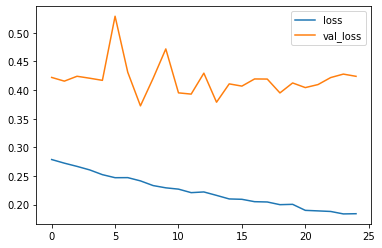

In [24]:
import matplotlib.pyplot as plt
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()

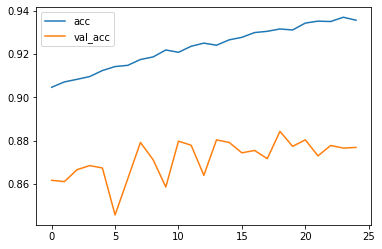

In [25]:
plt.plot(r.history['accuracy'], label='acc')
plt.plot(r.history['val_accuracy'], label='val_acc')
plt.legend()

Confusion matrix, without normalization
[[871  17  28  21   9   8   6   5  16  19]
 [  4 963   0   2   0   0   2   0   3  26]
 [ 20   0 837  31  30  33  37   8   1   3]
 [  3   4  23 780  30 114  37   7   0   2]
 [  3   2  22  28 883  24  27  10   0   1]
 [  2   0  14  93  18 855  12   4   0   2]
 [  2   2  17  42  11   7 913   0   3   3]
 [  5   0  12  31  39  50   8 851   1   3]
 [ 35  22  10  18   5   4   6   2 879  19]
 [  5  41   2   6   0   1   2   2   4 937]]


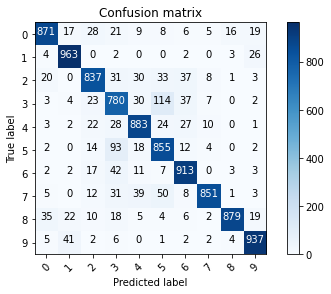

In [26]:
from sklearn.metrics import confusion_matrix
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
  """
  This function prints and plots the confusion matrix.
  Normalization can be applied by setting `normalize=True`.
  """
  if normalize:
      cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
      print("Normalized confusion matrix")
  else:
      print('Confusion matrix, without normalization')

  print(cm)

  plt.imshow(cm, interpolation='nearest', cmap=cmap)
  plt.title(title)
  plt.colorbar()
  tick_marks = np.arange(len(classes))
  plt.xticks(tick_marks, classes, rotation=45)
  plt.yticks(tick_marks, classes)

  fmt = '.2f' if normalize else 'd'
  thresh = cm.max() / 2.
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
      plt.text(j, i, format(cm[i, j], fmt),
               horizontalalignment="center",
               color="white" if cm[i, j] > thresh else "black")

  plt.tight_layout()
  plt.ylabel('True label')
  plt.xlabel('Predicted label')
  plt.show()


p_test = model.predict(x_test).argmax(axis=1)
cm = confusion_matrix(y_test, p_test)
plot_confusion_matrix(cm, list(range(10)))


In [0]:
labels = '''airplane
automobile
bird
cat
deer
dog
frog
horse
ship
truck'''.split()

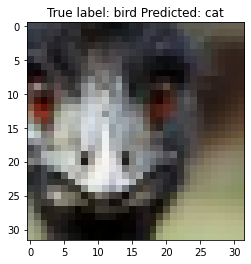

In [28]:
misclassified_idx = np.where(p_test != y_test)[0]
i = np.random.choice(misclassified_idx)
plt.imshow(x_test[i], cmap='gray')
plt.title("True label: %s Predicted: %s" % (labels[y_test[i]], labels[p_test[i]]));

In [29]:
model.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         [(None, 32, 32, 3)]       0         
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 32, 32, 32)        896       
_________________________________________________________________
batch_normalization_12 (Batc (None, 32, 32, 32)        128       
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 32, 32, 32)        9248      
_________________________________________________________________
batch_normalization_13 (Batc (None, 32, 32, 32)        128       
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 16, 16, 64)        1849